<a href="https://colab.research.google.com/github/HSE-LAMBDA/MLDM-2022/blob/master/09-neural-networks/NNs_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Clothes classification with neural network.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch

In [3]:
from torchvision import datasets, transforms

transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5), (0.5))
                               ])

# Download and load the training data
trainset = datasets.FashionMNIST('MNIST_data/', download = True, train = True, transform = transform)
testset = datasets.FashionMNIST('MNIST_data/', download = True, train = False, transform = transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size = 64, shuffle = True)
testloader = torch.utils.data.DataLoader(testset, batch_size = 64, shuffle = True)

100%|██████████| 26.4M/26.4M [00:01<00:00, 19.6MB/s]


Extracting MNIST_data/FashionMNIST/raw/train-images-idx3-ubyte.gz to MNIST_data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 339kB/s]


Extracting MNIST_data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to MNIST_data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:00<00:00, 6.34MB/s]


Extracting MNIST_data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to MNIST_data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 5.20MB/s]

Extracting MNIST_data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST_data/FashionMNIST/raw



[['Shirt' 'Sandal' 'Trouser' 'Shirt' 'Bag' 'T-shirt/top' 'Ankle boot'
  'Bag']
 ['Shirt' 'Dress' 'Shirt' 'Ankle boot' 'Dress' 'Shirt' 'Ankle boot'
  'Sandal']
 ['Sandal' 'Pullover' 'Ankle boot' 'Shirt' 'Sneaker' 'Trouser'
  'Ankle boot' 'Sandal']
 ['Trouser' 'Sneaker' 'Coat' 'Sneaker' 'Dress' 'Trouser' 'Sandal' 'Dress']
 ['Sneaker' 'Sandal' 'Sneaker' 'Bag' 'Shirt' 'Trouser' 'Shirt' 'Sandal']
 ['Pullover' 'Shirt' 'Sneaker' 'T-shirt/top' 'Sneaker' 'Sneaker'
  'Trouser' 'Bag']
 ['Sneaker' 'Ankle boot' 'Coat' 'Bag' 'Coat' 'Sandal' 'Trouser' 'Sandal']
 ['Bag' 'Ankle boot' 'Trouser' 'Sandal' 'Dress' 'Sneaker' 'Sandal'
  'Pullover']]
tensor([[[[-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000,  ..., -0.9843, -1.0000, -1.0000],
          ...,
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, 

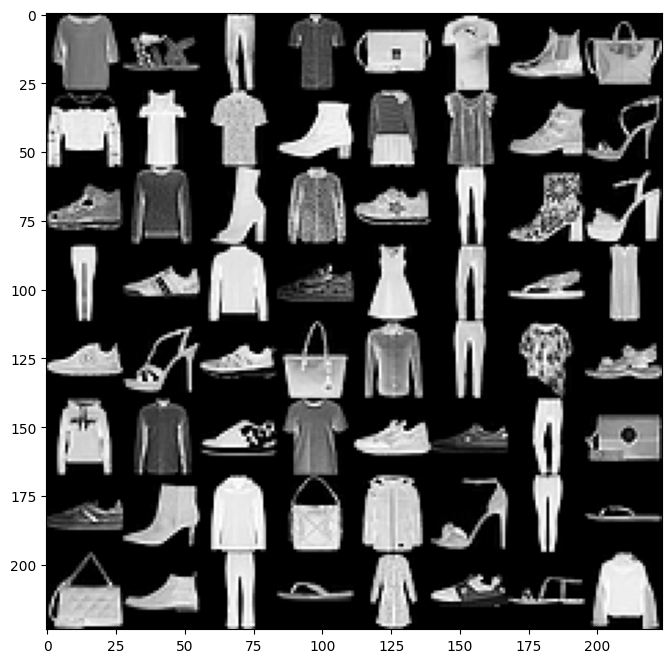

In [4]:
# Array for decoding the categories
label_names = np.array(['T-shirt/top',
                        'Trouser',
                        'Pullover',
                        'Dress',
                        'Coat',
                        'Sandal',
                        'Shirt',
                        'Sneaker',
                        'Bag',
                        'Ankle boot'])

# Get a single data batch of 64 images
sample_images, sample_labels = next(iter(trainloader))

# Plot the images in a 8x8 grid
plt.figure(figsize=(8, 8))
plt.imshow(
    sample_images.numpy().reshape(8, 8, 28, 28).transpose((0, 2, 1, 3)).reshape(224, 224),
    cmap='gray'
)
# Print corresponding labels
print(label_names[sample_labels.numpy().reshape(8, 8)])
print(sample_images)

**Task**:

Train a model which is an average of two models with different numbers of layers on the Fashion MNIST dataset, e.g.:

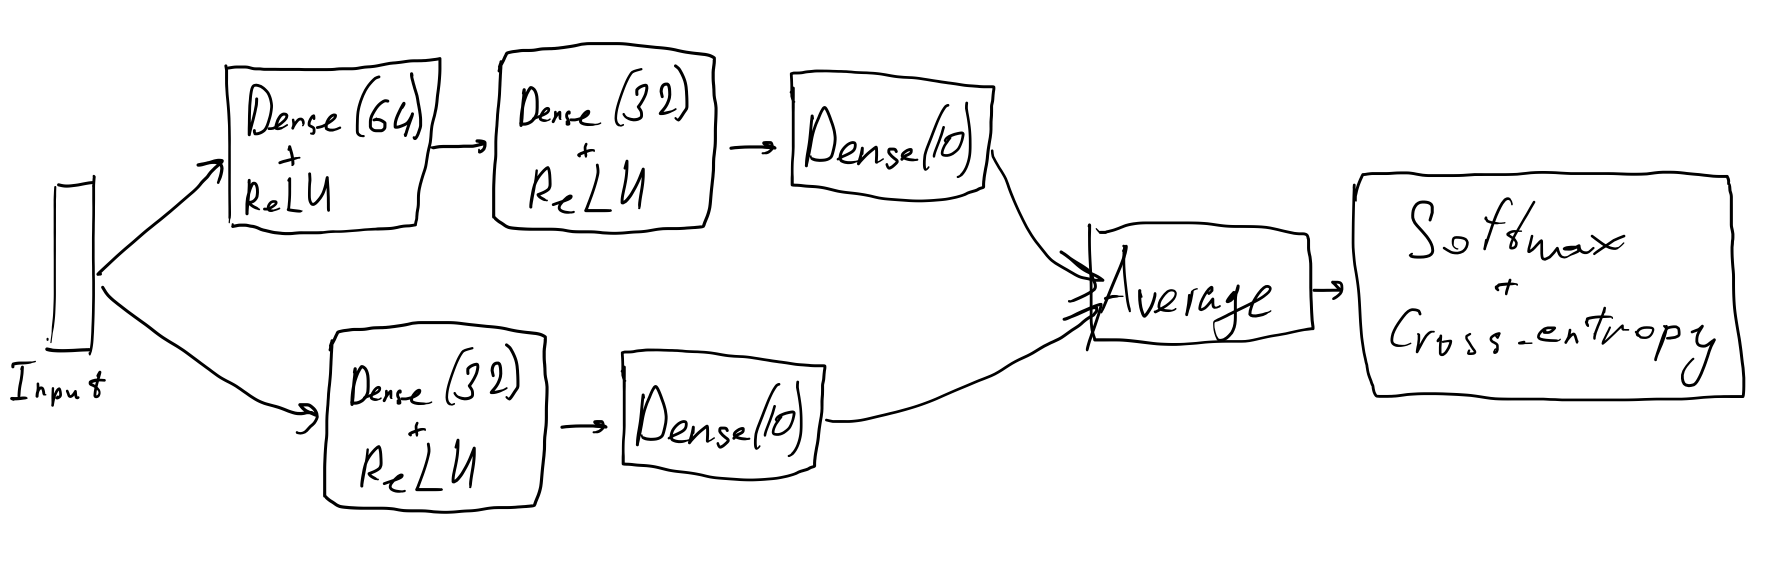

In [5]:
import torch.nn as nn            # for torch.nn.Module, the parent object for PyTorch models
import torch.nn.functional as F

In [6]:
if torch.cuda.is_available():
    my_device = torch.device('cuda')
else:
    my_device = torch.device('cpu')

In [7]:
seq_modules_1 = nn.Sequential(
    nn.Flatten(),
    nn.Linear(in_features=28*28, out_features=64),
    nn.ReLU(),
    nn.Linear(64, 32),
    nn.ReLU(),
    nn.Linear(32, 10)
)

seq_modules_2 = nn.Sequential(
    nn.Flatten(),
    nn.Linear(28*28, 32),
    nn.ReLU(),
    nn.Linear(32, 10)
)



In [12]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.part1 = seq_modules_1
        self.part2 = seq_modules_2
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x_1 = self.part1(x)
        x_2 = self.part2(x)
        x_res = 0.5 * x_1 + 0.5 * x_2
        return self.softmax(x_res)

In [13]:
import torch.optim as optim

In [14]:
net = Net()
# criterion = nn.CrossEntropyLoss()
criterion = nn.NLLLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [17]:
net.to(my_device)

for epoch in range(50):  # loop over the dataset multiple times

    for inputs, labels in trainloader:

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs.to(my_device))
        loss = criterion(torch.log(outputs), labels.to(my_device))
        loss.backward()
        optimizer.step()

    print('Epoch: ', epoch, 'Loss: ', loss.item())

print('Finished Training')

Epoch:  0 Loss:  0.5101480484008789
Epoch:  1 Loss:  0.34764331579208374
Epoch:  2 Loss:  0.34121137857437134
Epoch:  3 Loss:  0.506385862827301
Epoch:  4 Loss:  0.2718760073184967
Epoch:  5 Loss:  0.40968698263168335
Epoch:  6 Loss:  0.5966485738754272
Epoch:  7 Loss:  0.2343350499868393
Epoch:  8 Loss:  0.2652405798435211
Epoch:  9 Loss:  0.4179389774799347
Epoch:  10 Loss:  0.5023280382156372
Epoch:  11 Loss:  0.31609782576560974
Epoch:  12 Loss:  0.2560528516769409
Epoch:  13 Loss:  0.5830792784690857
Epoch:  14 Loss:  0.38089075684547424
Epoch:  15 Loss:  0.23959243297576904
Epoch:  16 Loss:  0.2499884068965912
Epoch:  17 Loss:  0.39533740282058716
Epoch:  18 Loss:  0.46229973435401917
Epoch:  19 Loss:  0.33405038714408875
Epoch:  20 Loss:  0.35326653718948364
Epoch:  21 Loss:  0.11654011905193329
Epoch:  22 Loss:  0.2947491407394409
Epoch:  23 Loss:  0.22665680944919586
Epoch:  24 Loss:  0.28880104422569275
Epoch:  25 Loss:  0.37834933400154114
Epoch:  26 Loss:  0.525362372398376

In [18]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
      # get the inputs
        inputs, labels = data

        # forward + backward + optimize
        outputs = net(inputs.to(my_device))
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels.to(my_device)).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 87 %
